#Solving Sudoku with Python!
In class, we covered recursive functions. Here is one example of how you can write a recursive function to solve Sudoku!

##Step 1 - Define your grid
Start by defining a sudoku grid that needs to be solved. I put zeros in places where I do not what the values.

In [14]:
import matplotlib.pyplot as plt
import numpy as np

grid=[[5,3,0,0,7,0,0,0,0],
      [6,0,0,1,9,5,0,0,0],
      [0,9,8,0,0,0,0,6,0],
      [8,0,0,0,6,0,0,0,3],
      [4,0,0,8,0,3,0,0,1],
      [7,0,0,0,2,0,0,0,6],
      [0,6,0,0,0,0,2,8,0],
      [0,0,0,4,1,9,0,0,5],
      [0,0,0,0,8,0,0,7,9]]

##Step 1.5 - Plotting function
We need a function to plot this!

In [15]:
def plot_sudoku(grid):
    fig, ax = plt.subplots(figsize=(8, 8))

    # Set the limits and aspect
    ax.set_xlim(0, 9)
    ax.set_ylim(0, 9)
    ax.set_aspect('equal')

    # Remove axis ticks
    ax.set_xticks([])
    ax.set_yticks([])

    # Draw the grid lines
    for i in range(10):
        linewidth = 3 if i % 3 == 0 else 1
        color = 'black' if i % 3 == 0 else 'gray'

        # Horizontal lines
        ax.plot([0, 9], [i, i], color=color, linewidth=linewidth)
        # Vertical lines
        ax.plot([i, i], [0, 9], color=color, linewidth=linewidth)

    # Add numbers to the grid
    for y in range(9):
        for x in range(9):
            if grid[y][x] != 0:
                # y-coordinate is inverted to match typical Sudoku layout
                ax.text(x + 0.5, 9 - y - 0.5, str(grid[y][x]),
                       ha='center', va='center',
                       fontsize=20, fontweight='bold', color='black')

    # Invert y-axis so (0,0) is at top-left
    ax.invert_yaxis()

    plt.title('Sudoku Grid', fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()

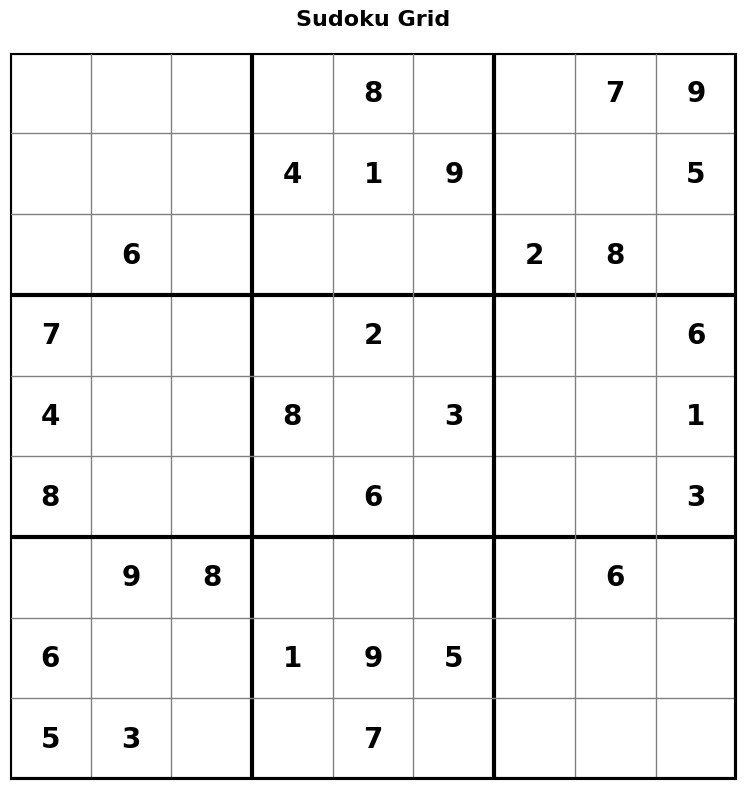

In [16]:
plot_sudoku(grid)

##Step 2 - Functions
We need two functions


1.   A function that that determines if it is possible to place a number in a position. This function will return `True` if a number can be placed in that position and `False` otherwise.
2.   A function that iterates through the grid and attempts to solve it. This function will loop through all empty points and will attempt to place a possible value to the empty point. If it can, it will pass the new grid to itself and keep going! If say, at some point, the puzzle became impossible, it will climb back up and put back 0 and say n was not possible!

*For example, let's say you put 3 in an empty position. It looked good at the time. But after you put 3 in that position, the puzzle became impossible to solve. The only way forward is to remove that 3 and try 4 (or higher numbers)*



In [3]:
#This function checks if it's possible to place a number in a given position
def possible(grid,y,x,n): #is it possible to place n into x,y?
    for i in range(0,9): #Possible to place n in column y?
        if grid[y][i]==n:
            return False
    for i in range(0,9): #Possible to place n in row x?
        if grid[i][x]==n:
            return False
    x0=x//3*3
    y0=y//3*3
    for i in range(0,3): #Possible to place n in 3x3 grid?
        for j in range(0,3):
            if grid[y0+i][x0+j]==n:
                return False
    return True

In [4]:
#This one solves it by using the first function
def solve(grid):
    for y in range(9):  # Loop through the columns of the grid
        for x in range(9):  # and the rows
            if grid[y][x] == 0:  # if a position is empty
                for n in range(1, 10):  # try to insert all possible values (1-9)
                    if possible(grid, y, x, n):  # if you can insert n
                        grid[y][x] = n  # insert n to the grid
                        if solve(grid):  # Anything that is not None will return True here
                            return grid  # if successful, return the solved grid
                        grid[y][x] = 0  # backtrack if it didn't work
                return None  # no valid number found, trigger backtracking
    return grid  # all positions filled, puzzle solved!

##Step 3 - Solve the Grid!

In [7]:
#We can now pass the empty grid and solve it!
solved_grid = solve(grid)
solved_grid

[[5, 3, 4, 6, 7, 8, 9, 1, 2],
 [6, 7, 2, 1, 9, 5, 3, 4, 8],
 [1, 9, 8, 3, 4, 2, 5, 6, 7],
 [8, 5, 9, 7, 6, 1, 4, 2, 3],
 [4, 2, 6, 8, 5, 3, 7, 9, 1],
 [7, 1, 3, 9, 2, 4, 8, 5, 6],
 [9, 6, 1, 5, 3, 7, 2, 8, 4],
 [2, 8, 7, 4, 1, 9, 6, 3, 5],
 [3, 4, 5, 2, 8, 6, 1, 7, 9]]

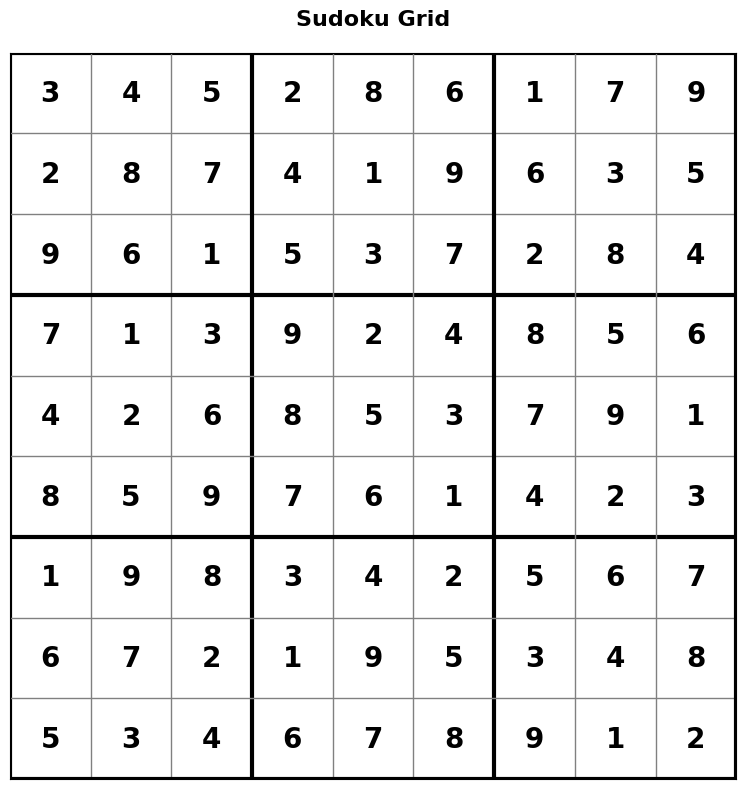

In [11]:
plot_sudoku(solved_grid) #this is one of the solutions!